# Exploración de Reportes y Visualizaciones

Este notebook explora los reportes y visualizaciones generados por el pipeline de reportes.

## Prerequisitos:
- Ejecutar primero: `kedro run --pipeline=reportes`
- Asegurarse de que los reportes estén creados en `data/08_reporting/`


## 1. Configuración Inicial


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")

# Inicializar Kedro si no está disponible
try:
    # Verificar si catalog y session están disponibles
    if 'catalog' not in globals() or 'session' not in globals():
        print("Inicializando Kedro manualmente...")
        from kedro.framework.session import KedroSession
        from kedro.framework.startup import bootstrap_project
        
        # Bootstrap del proyecto - ir dos niveles arriba desde reportes/
        project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
        bootstrap_project(project_root)
        
        # Crear sesión
        session = KedroSession.create()
        catalog = session.load_context().catalog
        
        print("✅ Kedro inicializado correctamente")
    else:
        print("✅ Kedro ya está disponible")
        
    print(f"Directorio de trabajo: {os.getcwd()}")
    print(f"Catalog disponible: {catalog is not None}")
    print(f"Session disponible: {session is not None}")
    
except Exception as e:
    print(f"❌ Error inicializando Kedro: {e}")
    print("💡 Solución: Ejecuta 'kedro jupyter notebook' desde la terminal")
    print("   O ejecuta este notebook desde el directorio raíz del proyecto")


Librerías importadas correctamente
Inicializando Kedro manualmente...


[09/17/25 15:06:51] INFO     Using                                                                  ]8;id=993859;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=667664;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\framework\pr                
                             oject\rich_logging.yml' as logging configuration.                                     

[09/17/25 15:06:52] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=920544;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=610089;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

✅ Kedro inicializado correctamente
Directorio de trabajo: C:\ProyectoML2\proyecto-ml\notebooks\reportes
Catalog disponible: True
Session disponible: True


## 2. Reporte de Calidad de Datos


In [2]:
# Cargar reporte de calidad de datos
try:
    reporte_calidad = catalog.load('reporte_calidad_datos')
    
    print("REPORTE DE CALIDAD DE DATOS")
    print("=" * 40)
    
    # Mostrar resumen ejecutivo
    if 'resumen_ejecutivo' in reporte_calidad:
        print("\n📊 RESUMEN EJECUTIVO:")
        for dataset, metrics in reporte_calidad['resumen_ejecutivo'].items():
            print(f"\n  {dataset.upper()}:")
            for metrica, valor in metrics.items():
                if isinstance(valor, float):
                    print(f"    {metrica}: {valor:.2%}")
                else:
                    print(f"    {metrica}: {valor}")
    
    # Mostrar estado general
    if 'estado_general' in reporte_calidad:
        estado = reporte_calidad['estado_general']
        print(f"\n🎯 ESTADO GENERAL: {estado}")
        
        if estado == "BUENO":
            print("   ✅ La calidad de los datos es aceptable para análisis")
        elif estado == "REQUIERE_ATENCION":
            print("   ⚠️  Los datos requieren revisión antes del análisis")
        else:
            print("   ❓ Estado desconocido")
    
    # Mostrar recomendaciones
    if 'recomendaciones' in reporte_calidad:
        print(f"\n💡 RECOMENDACIONES:")
        for i, recomendacion in enumerate(reporte_calidad['recomendaciones'], 1):
            print(f"   {i}. {recomendacion}")
    
    # Mostrar métricas detalladas
    if 'metricas_detalladas' in reporte_calidad:
        print(f"\n📈 MÉTRICAS DETALLADAS:")
        for dataset, metrics in reporte_calidad['metricas_detalladas'].items():
            if isinstance(metrics, dict):
                print(f"\n  {dataset}:")
                for metrica, valor in metrics.items():
                    if isinstance(valor, float):
                        print(f"    {metrica}: {valor:.2%}")
                    else:
                        print(f"    {metrica}: {valor}")
        
except Exception as e:
    print(f"Error cargando reporte de calidad: {e}")
    print("Asegúrate de haber ejecutado: kedro run --pipeline=reportes")


[09/17/25 15:07:09] INFO     Loading data from reporte_calidad_datos (PickleDataset)...        ]8;id=512971;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=427942;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

REPORTE DE CALIDAD DE DATOS

📊 RESUMEN EJECUTIVO:

  DEFUNCIONES:
    total_registros: 1246214
    completitud: 0
    duplicados: 0
    outliers: 0

🎯 ESTADO GENERAL: REQUIERE_ATENCION
   ⚠️  Los datos requieren revisión antes del análisis

💡 RECOMENDACIONES:
   1. Defunciones: Completitud baja, revisar valores faltantes

📈 MÉTRICAS DETALLADAS:

  defunciones:
    total_registros: 1246214
    total_columnas: 15
    valores_nulos: 0
    duplicados: 0
    rango_fechas: {'inicio': '2014-01-01', 'fin': '2024-09-28'}
    años_unicos: 11
    regiones_unicas: 17

  nacimientos:
    total_registros: 9
    total_columnas: 5
    valores_nulos: 0
    duplicados: 0
    años_unicos: 9


## 3. Reporte de Features Temporales


In [3]:
# Cargar reporte de features temporales
try:
    reporte_features = catalog.load('reporte_features_temporales')
    
    print("REPORTE DE FEATURES TEMPORALES")
    print("=" * 40)
    
    # Mostrar resumen de features
    if 'resumen_features' in reporte_features:
        print("\n🔧 RESUMEN DE FEATURES:")
        for metrica, valor in reporte_features['resumen_features'].items():
            print(f"  {metrica}: {valor}")
    
    # Mostrar distribución temporal
    if 'distribucion_temporal' in reporte_features:
        print(f"\n📅 DISTRIBUCIÓN TEMPORAL:")
        for metrica, valor in reporte_features['distribucion_temporal'].items():
            print(f"  {metrica}: {valor}")
    
    # Mostrar recomendaciones
    if 'recomendaciones' in reporte_features:
        print(f"\n💡 RECOMENDACIONES:")
        for i, recomendacion in enumerate(reporte_features['recomendaciones'], 1):
            print(f"   {i}. {recomendacion}")
    
    # Mostrar análisis cíclicos
    if 'analisis_ciclicos' in reporte_features:
        print(f"\n🔄 ANÁLISIS CÍCLICOS:")
        for metrica, valor in reporte_features['analisis_ciclicos'].items():
            print(f"  {metrica}: {valor}")
        
except Exception as e:
    print(f"Error cargando reporte de features: {e}")
    print("Asegúrate de haber ejecutado: kedro run --pipeline=reportes")


[09/17/25 15:07:13] INFO     Loading data from reporte_features_temporales (PickleDataset)...  ]8;id=705175;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=993516;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

REPORTE DE FEATURES TEMPORALES

🔧 RESUMEN DE FEATURES:
  total_features: 31
  features_ciclicos: 8
  features_especiales: 3
  total_registros: 1246214

📅 DISTRIBUCIÓN TEMPORAL:
  años_cubiertos: 11
  rango_años: 2014-2024

💡 RECOMENDACIONES:
   1. Features cíclicos completos para modelado temporal

🔄 ANÁLISIS CÍCLICOS:


## 4. Visualizaciones Generadas


In [5]:
# Cargar información de visualizaciones
try:
    visualizaciones_calidad = catalog.load('visualizaciones_calidad')
    visualizaciones_features = catalog.load('visualizaciones_features')
    
    print("VISUALIZACIONES GENERADAS")
    print("=" * 30)
    
    # Mostrar visualizaciones de calidad
    if visualizaciones_calidad:
        print("\n📊 VISUALIZACIONES DE CALIDAD:")
        for tipo, ruta in visualizaciones_calidad.items():
            # Convertir ruta relativa a absoluta desde notebooks/reportes/
            ruta_absoluta = os.path.abspath(os.path.join("../../", ruta))
            if os.path.exists(ruta_absoluta):
                print(f"  ✅ {tipo}: {ruta}")
            else:
                print(f"  ❌ {tipo}: {ruta} (archivo no encontrado)")
    else:
        print("\n📊 VISUALIZACIONES DE CALIDAD: No se generaron visualizaciones")
    
    # Mostrar visualizaciones de features
    if visualizaciones_features:
        print(f"\n🔧 VISUALIZACIONES DE FEATURES:")
        for tipo, ruta in visualizaciones_features.items():
            # Convertir ruta relativa a absoluta desde notebooks/reportes/
            ruta_absoluta = os.path.abspath(os.path.join("../../", ruta))
            if os.path.exists(ruta_absoluta):
                print(f"  ✅ {tipo}: {ruta}")
            else:
                print(f"  ❌ {tipo}: {ruta} (archivo no encontrado)")
    else:
        print(f"\n�� VISUALIZACIONES DE FEATURES: No se generaron visualizaciones")
    
    # Mostrar archivos PNG disponibles
    print(f"\n🖼️ ARCHIVOS PNG DISPONIBLES:")
    png_files = list(Path("../../data/08_reporting").glob("*.png"))
    if png_files:
        for png_file in png_files:
            size_kb = png_file.stat().st_size / 1024
            print(f"  �� {png_file.name} ({size_kb:.1f} KB)")
    else:
        print("  No se encontraron archivos PNG")
        
except Exception as e:
    print(f"Error cargando visualizaciones: {e}")
    print("Asegúrate de haber ejecutado: kedro run --pipeline=reportes")


[09/17/25 15:09:13] INFO     Loading data from visualizaciones_calidad (PickleDataset)...      ]8;id=457162;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=141873;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from visualizaciones_features (PickleDataset)...     ]8;id=493614;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=931234;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

VISUALIZACIONES GENERADAS

📊 VISUALIZACIONES DE CALIDAD:
  ✅ completitud: data\08_reporting\completitud_datos.png
  ✅ duplicados: data\08_reporting\duplicados_datos.png
  ✅ valores_nulos: data\08_reporting\valores_nulos_datos.png

🔧 VISUALIZACIONES DE FEATURES:
  ✅ features_ciclicos: data\08_reporting\features_ciclicos.png
  ✅ distribucion_temporal: data\08_reporting\distribucion_temporal.png

🖼️ ARCHIVOS PNG DISPONIBLES:
  �� completitud_datos.png (88.9 KB)
  �� distribucion_temporal.png (134.8 KB)
  �� duplicados_datos.png (90.3 KB)
  �� features_ciclicos.png (258.8 KB)
  �� valores_nulos_datos.png (88.1 KB)


## 5. Mostrar Visualizaciones


VISUALIZACIONES GENERADAS:

📊 COMPLETITUD_DATOS:


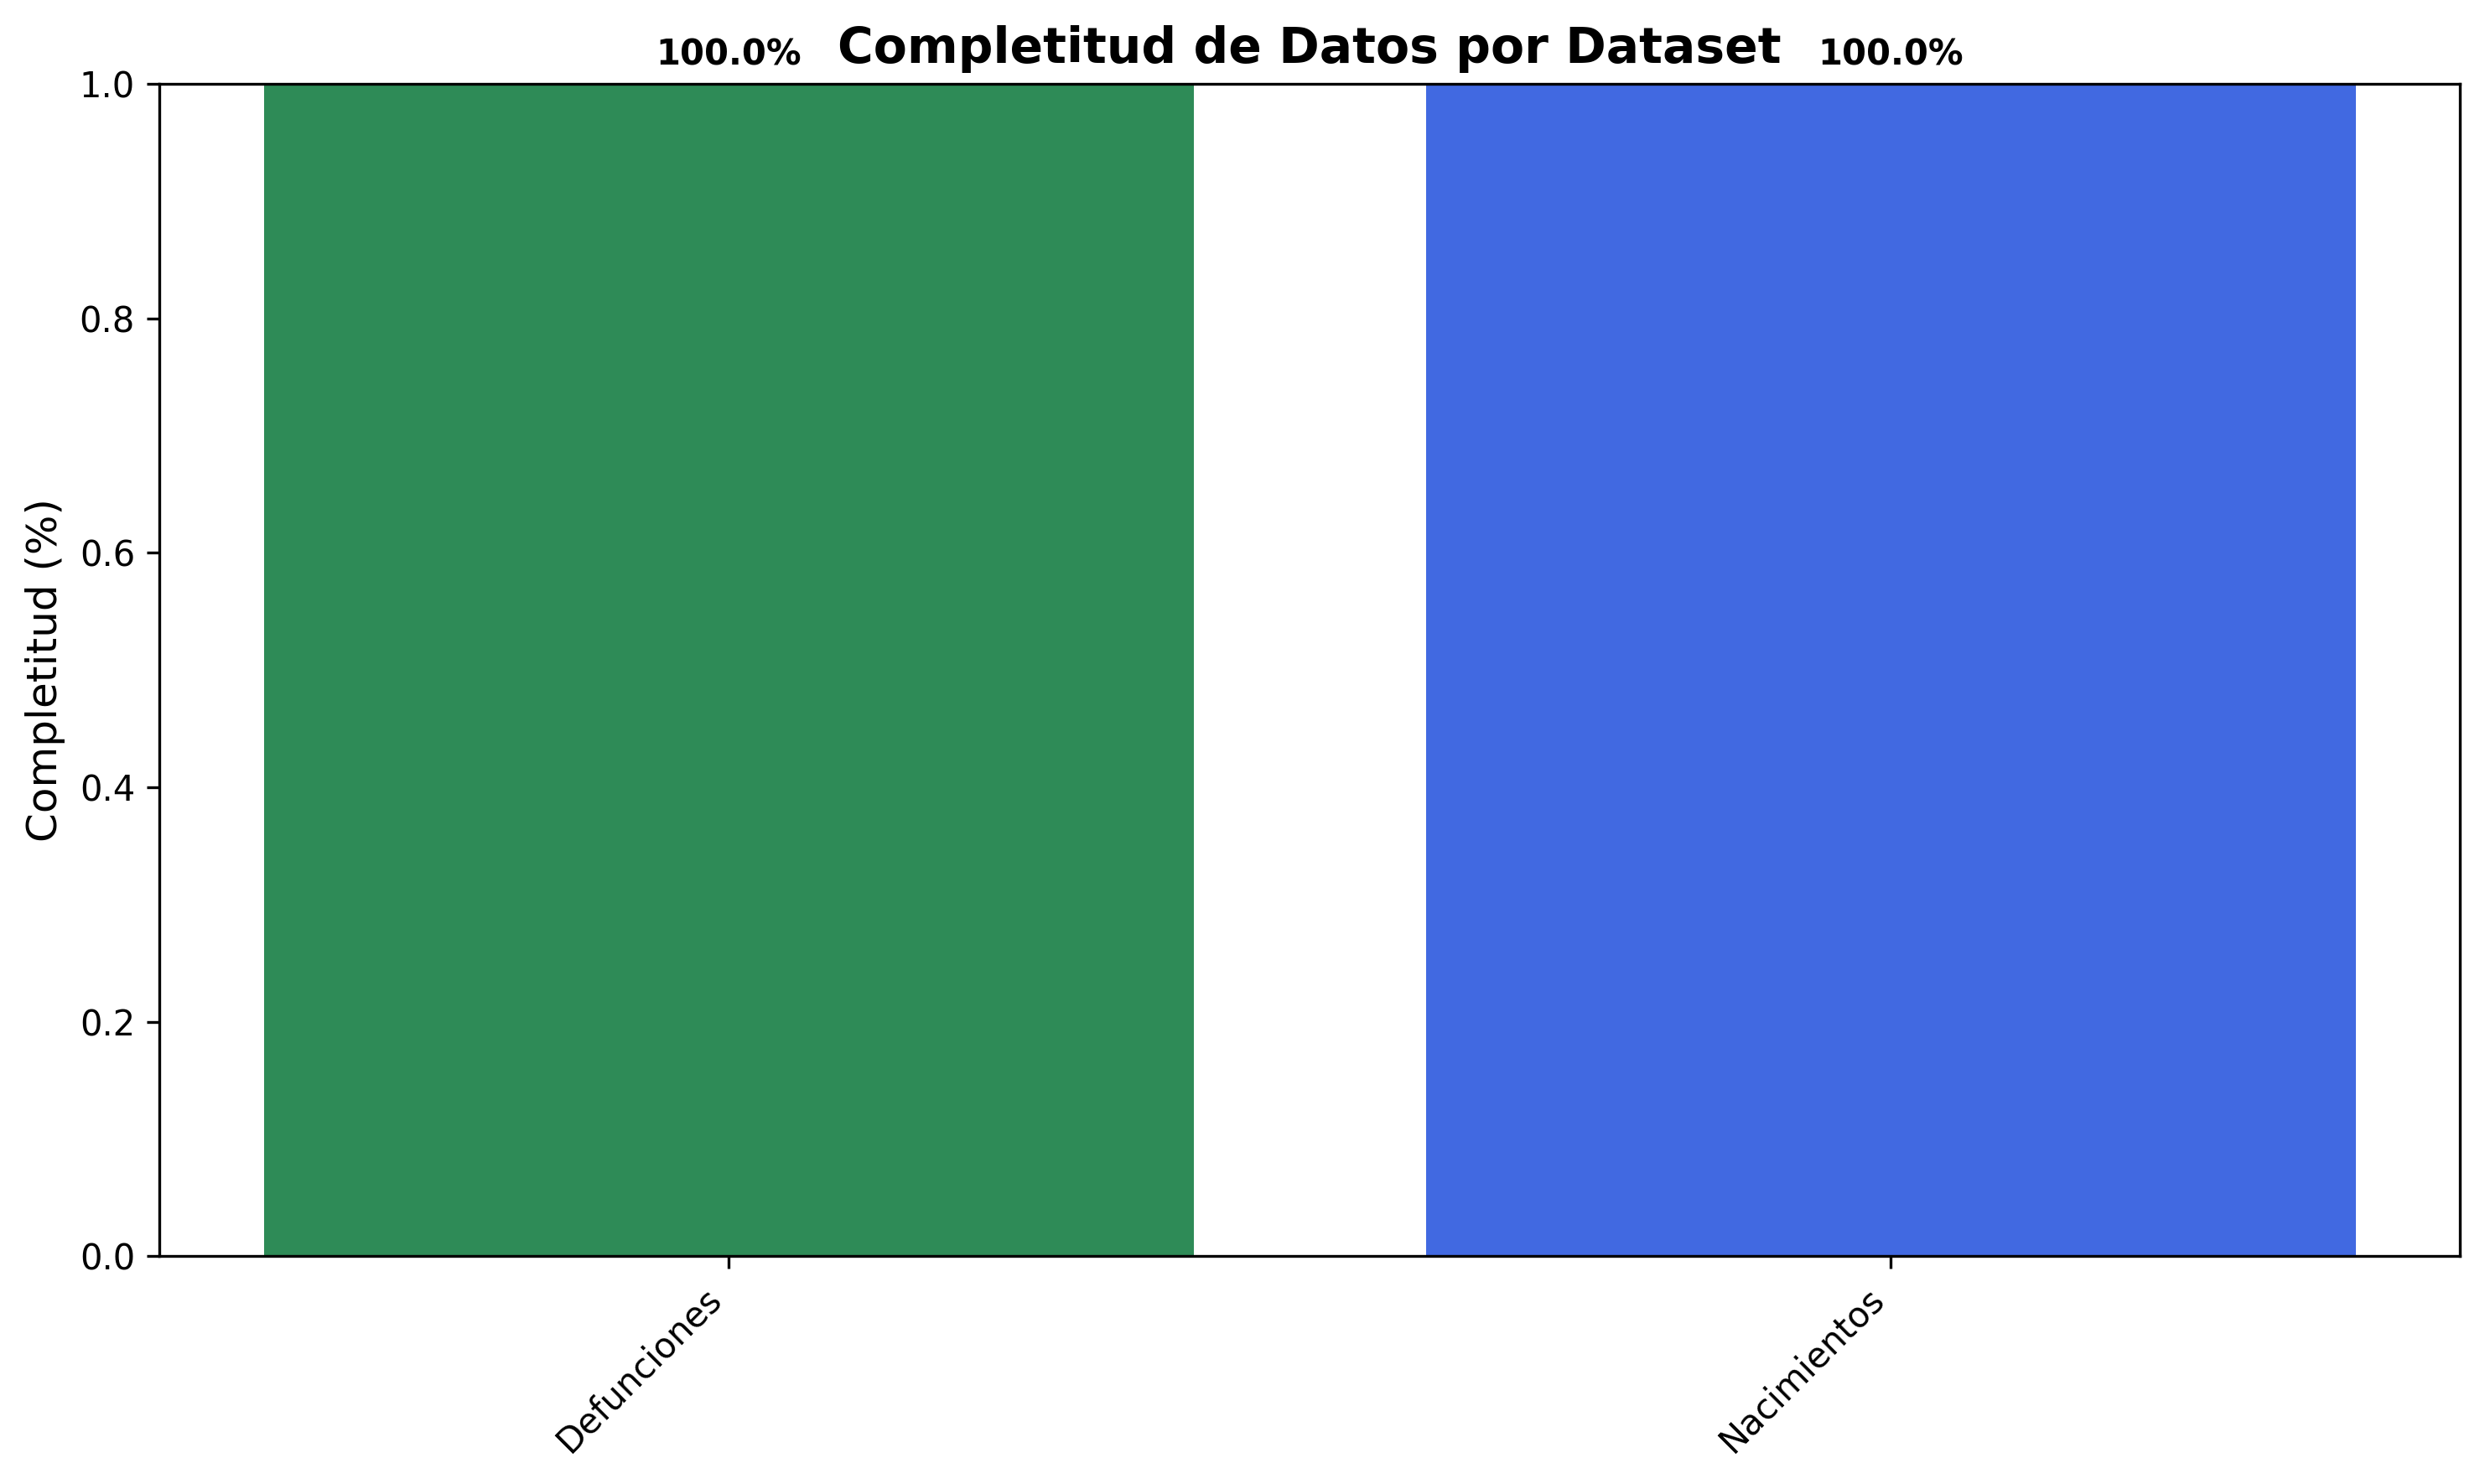


📊 DISTRIBUCION_TEMPORAL:


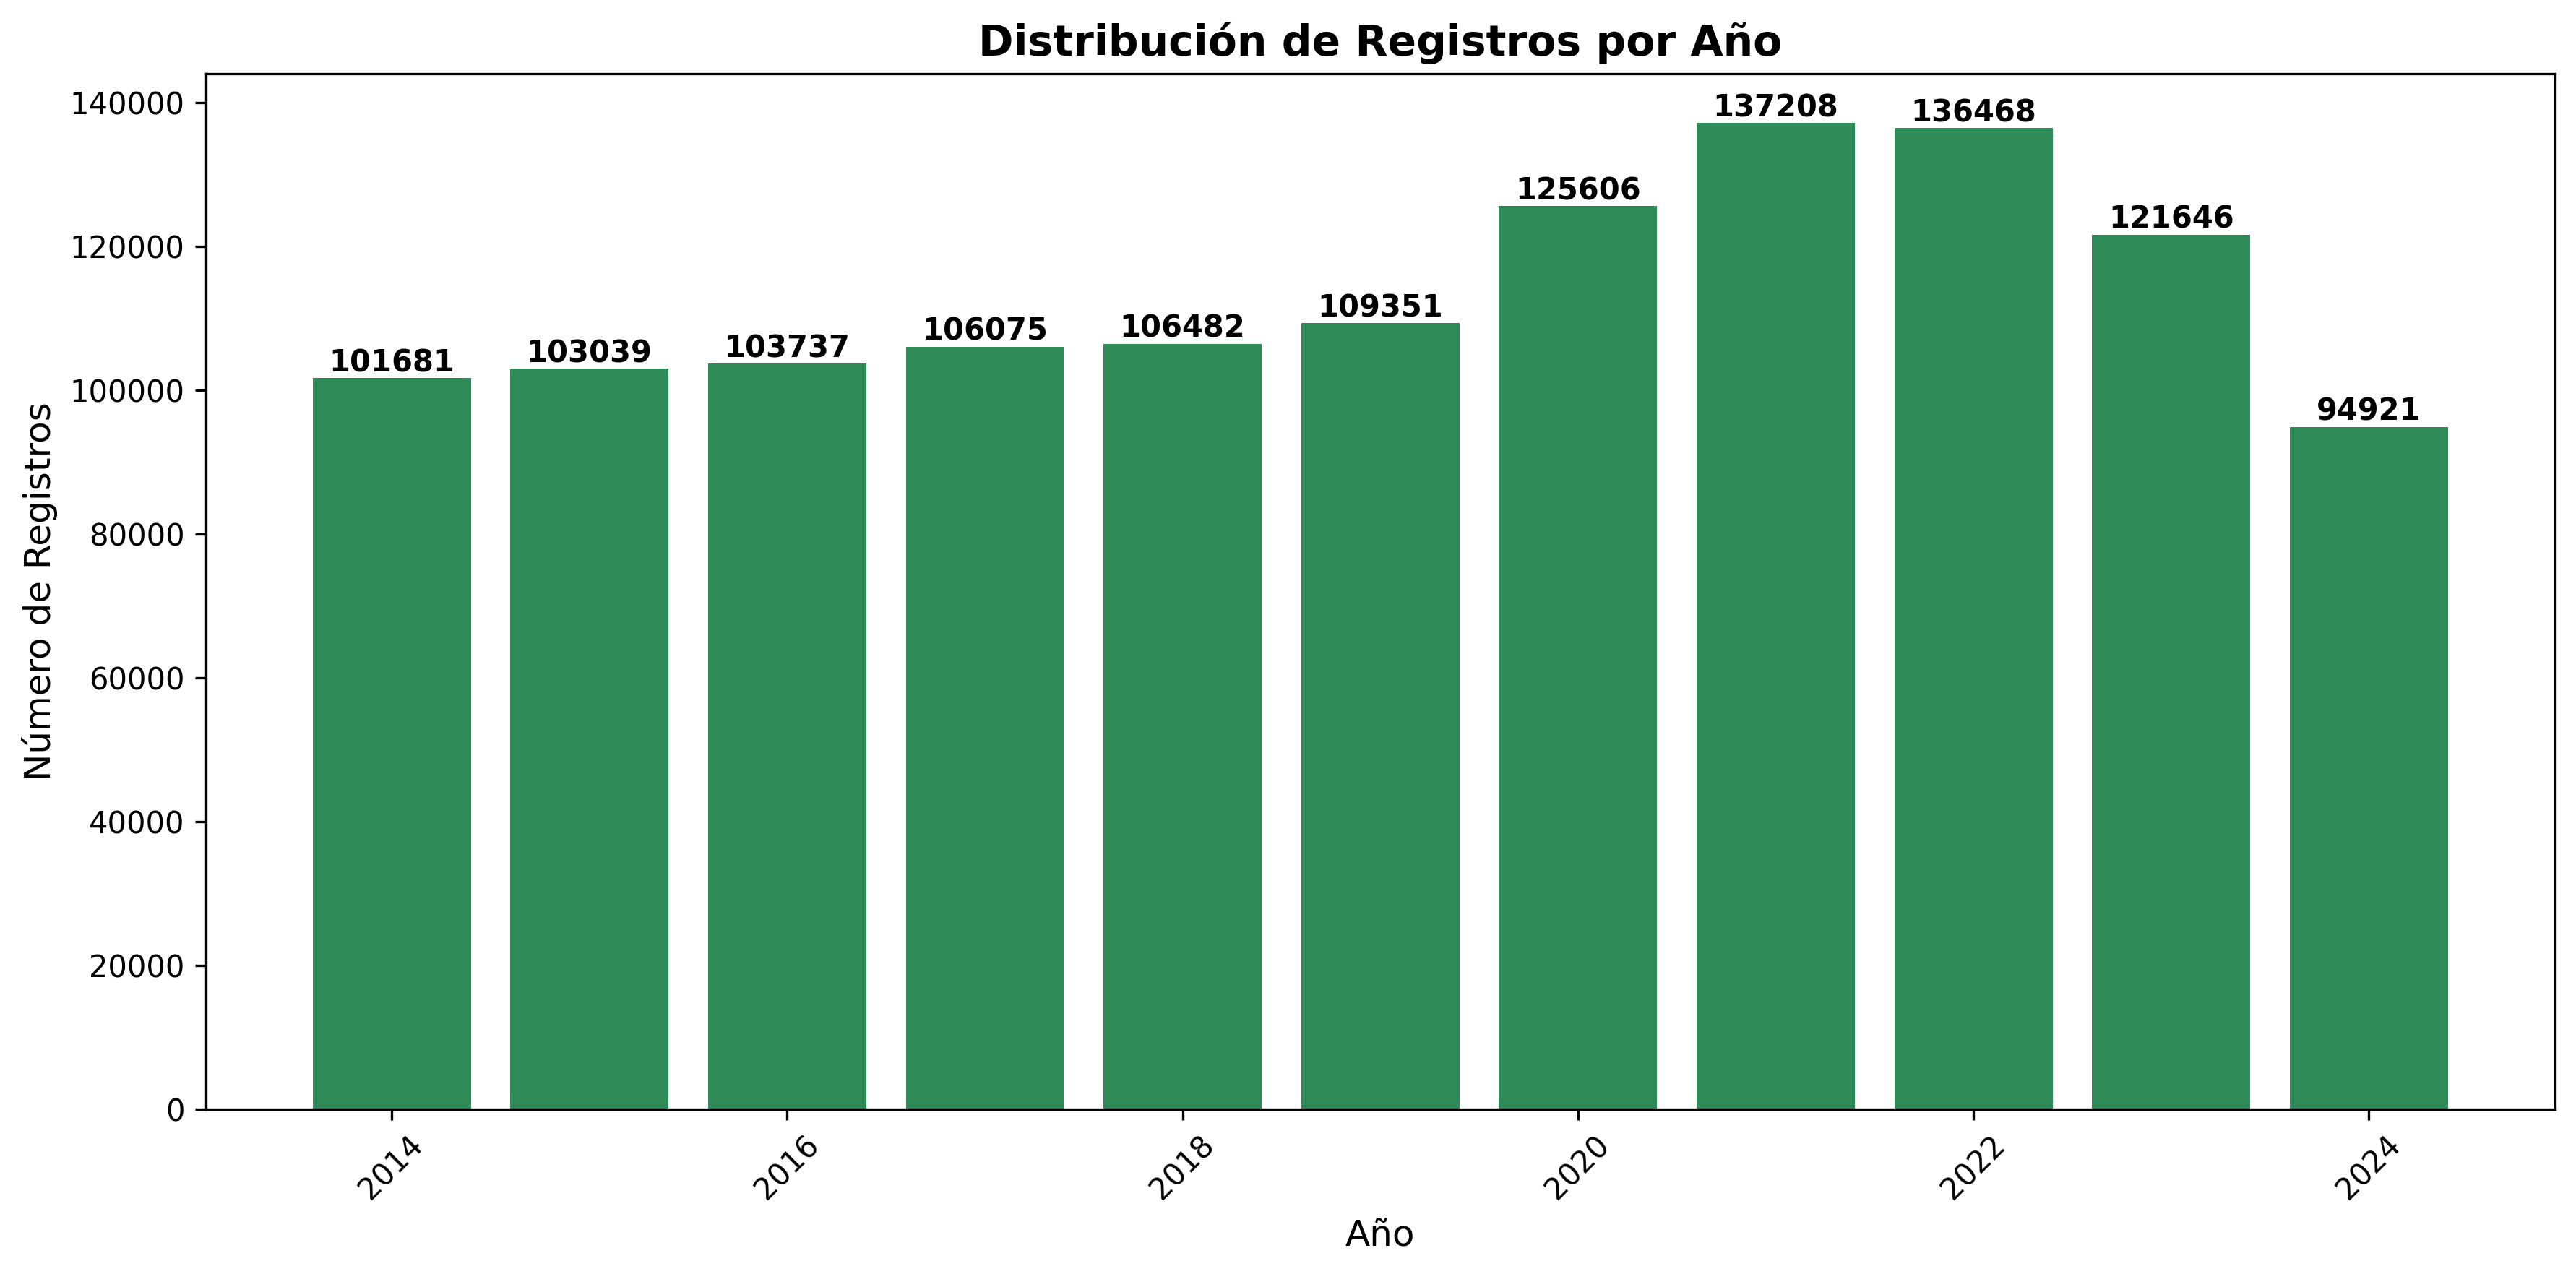


📊 DUPLICADOS_DATOS:


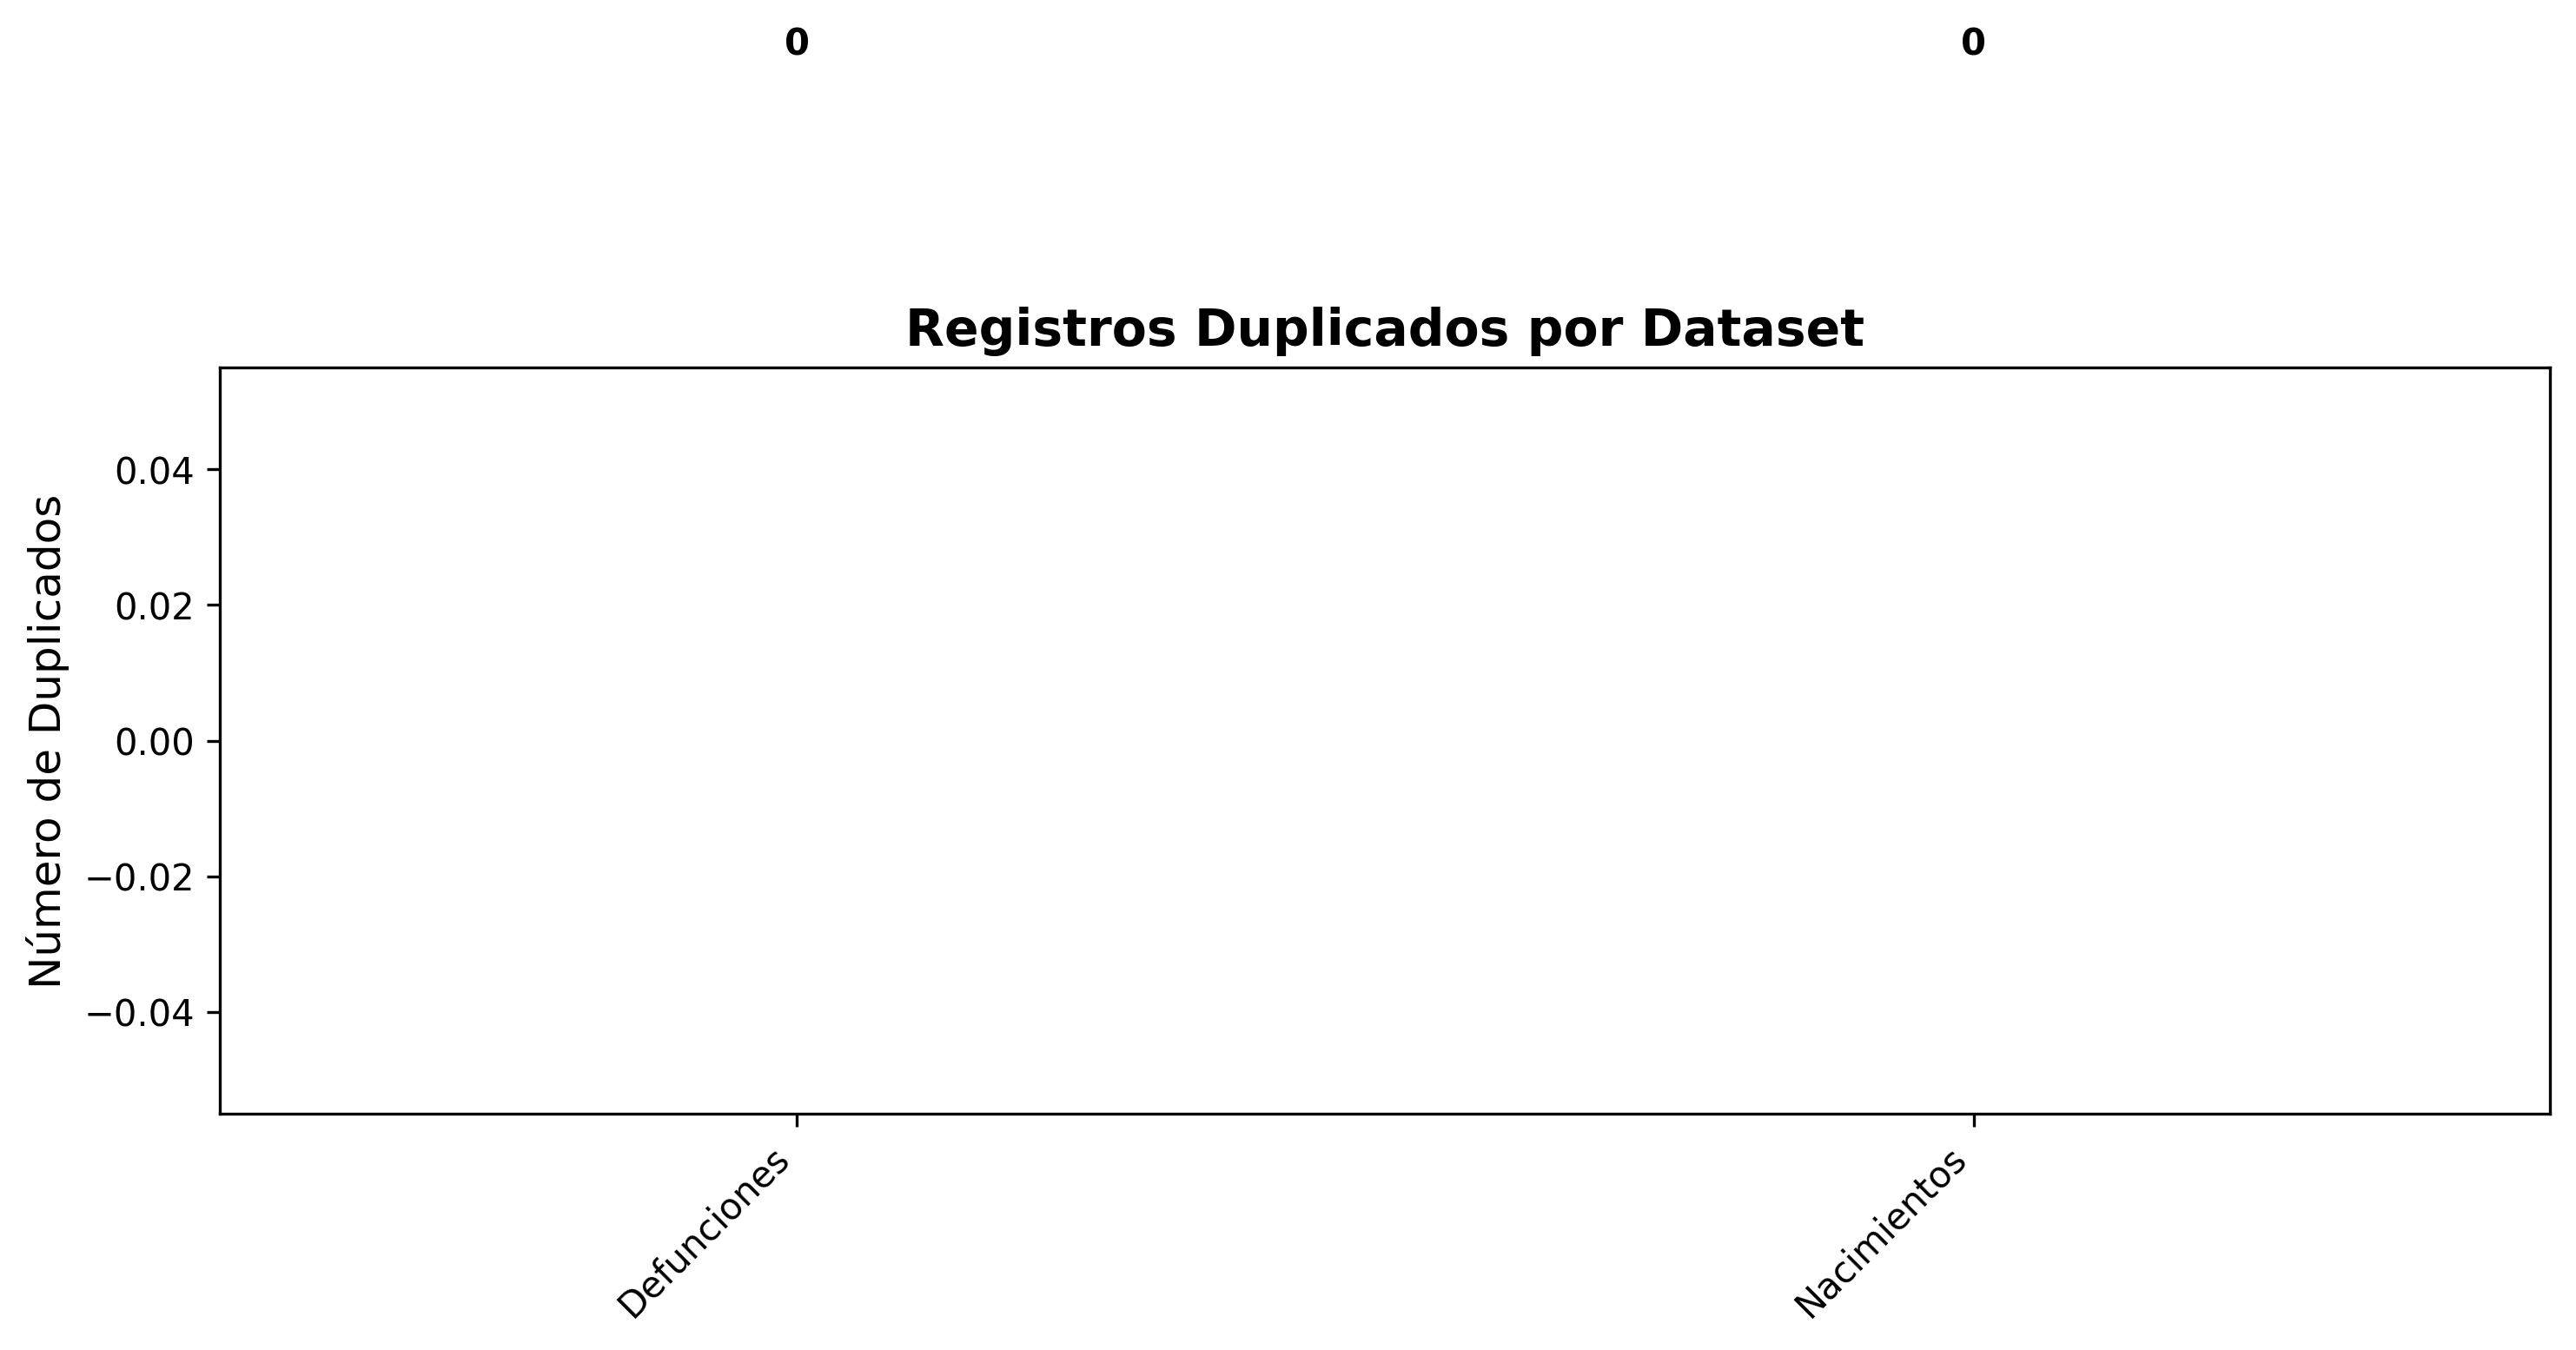


📊 FEATURES_CICLICOS:


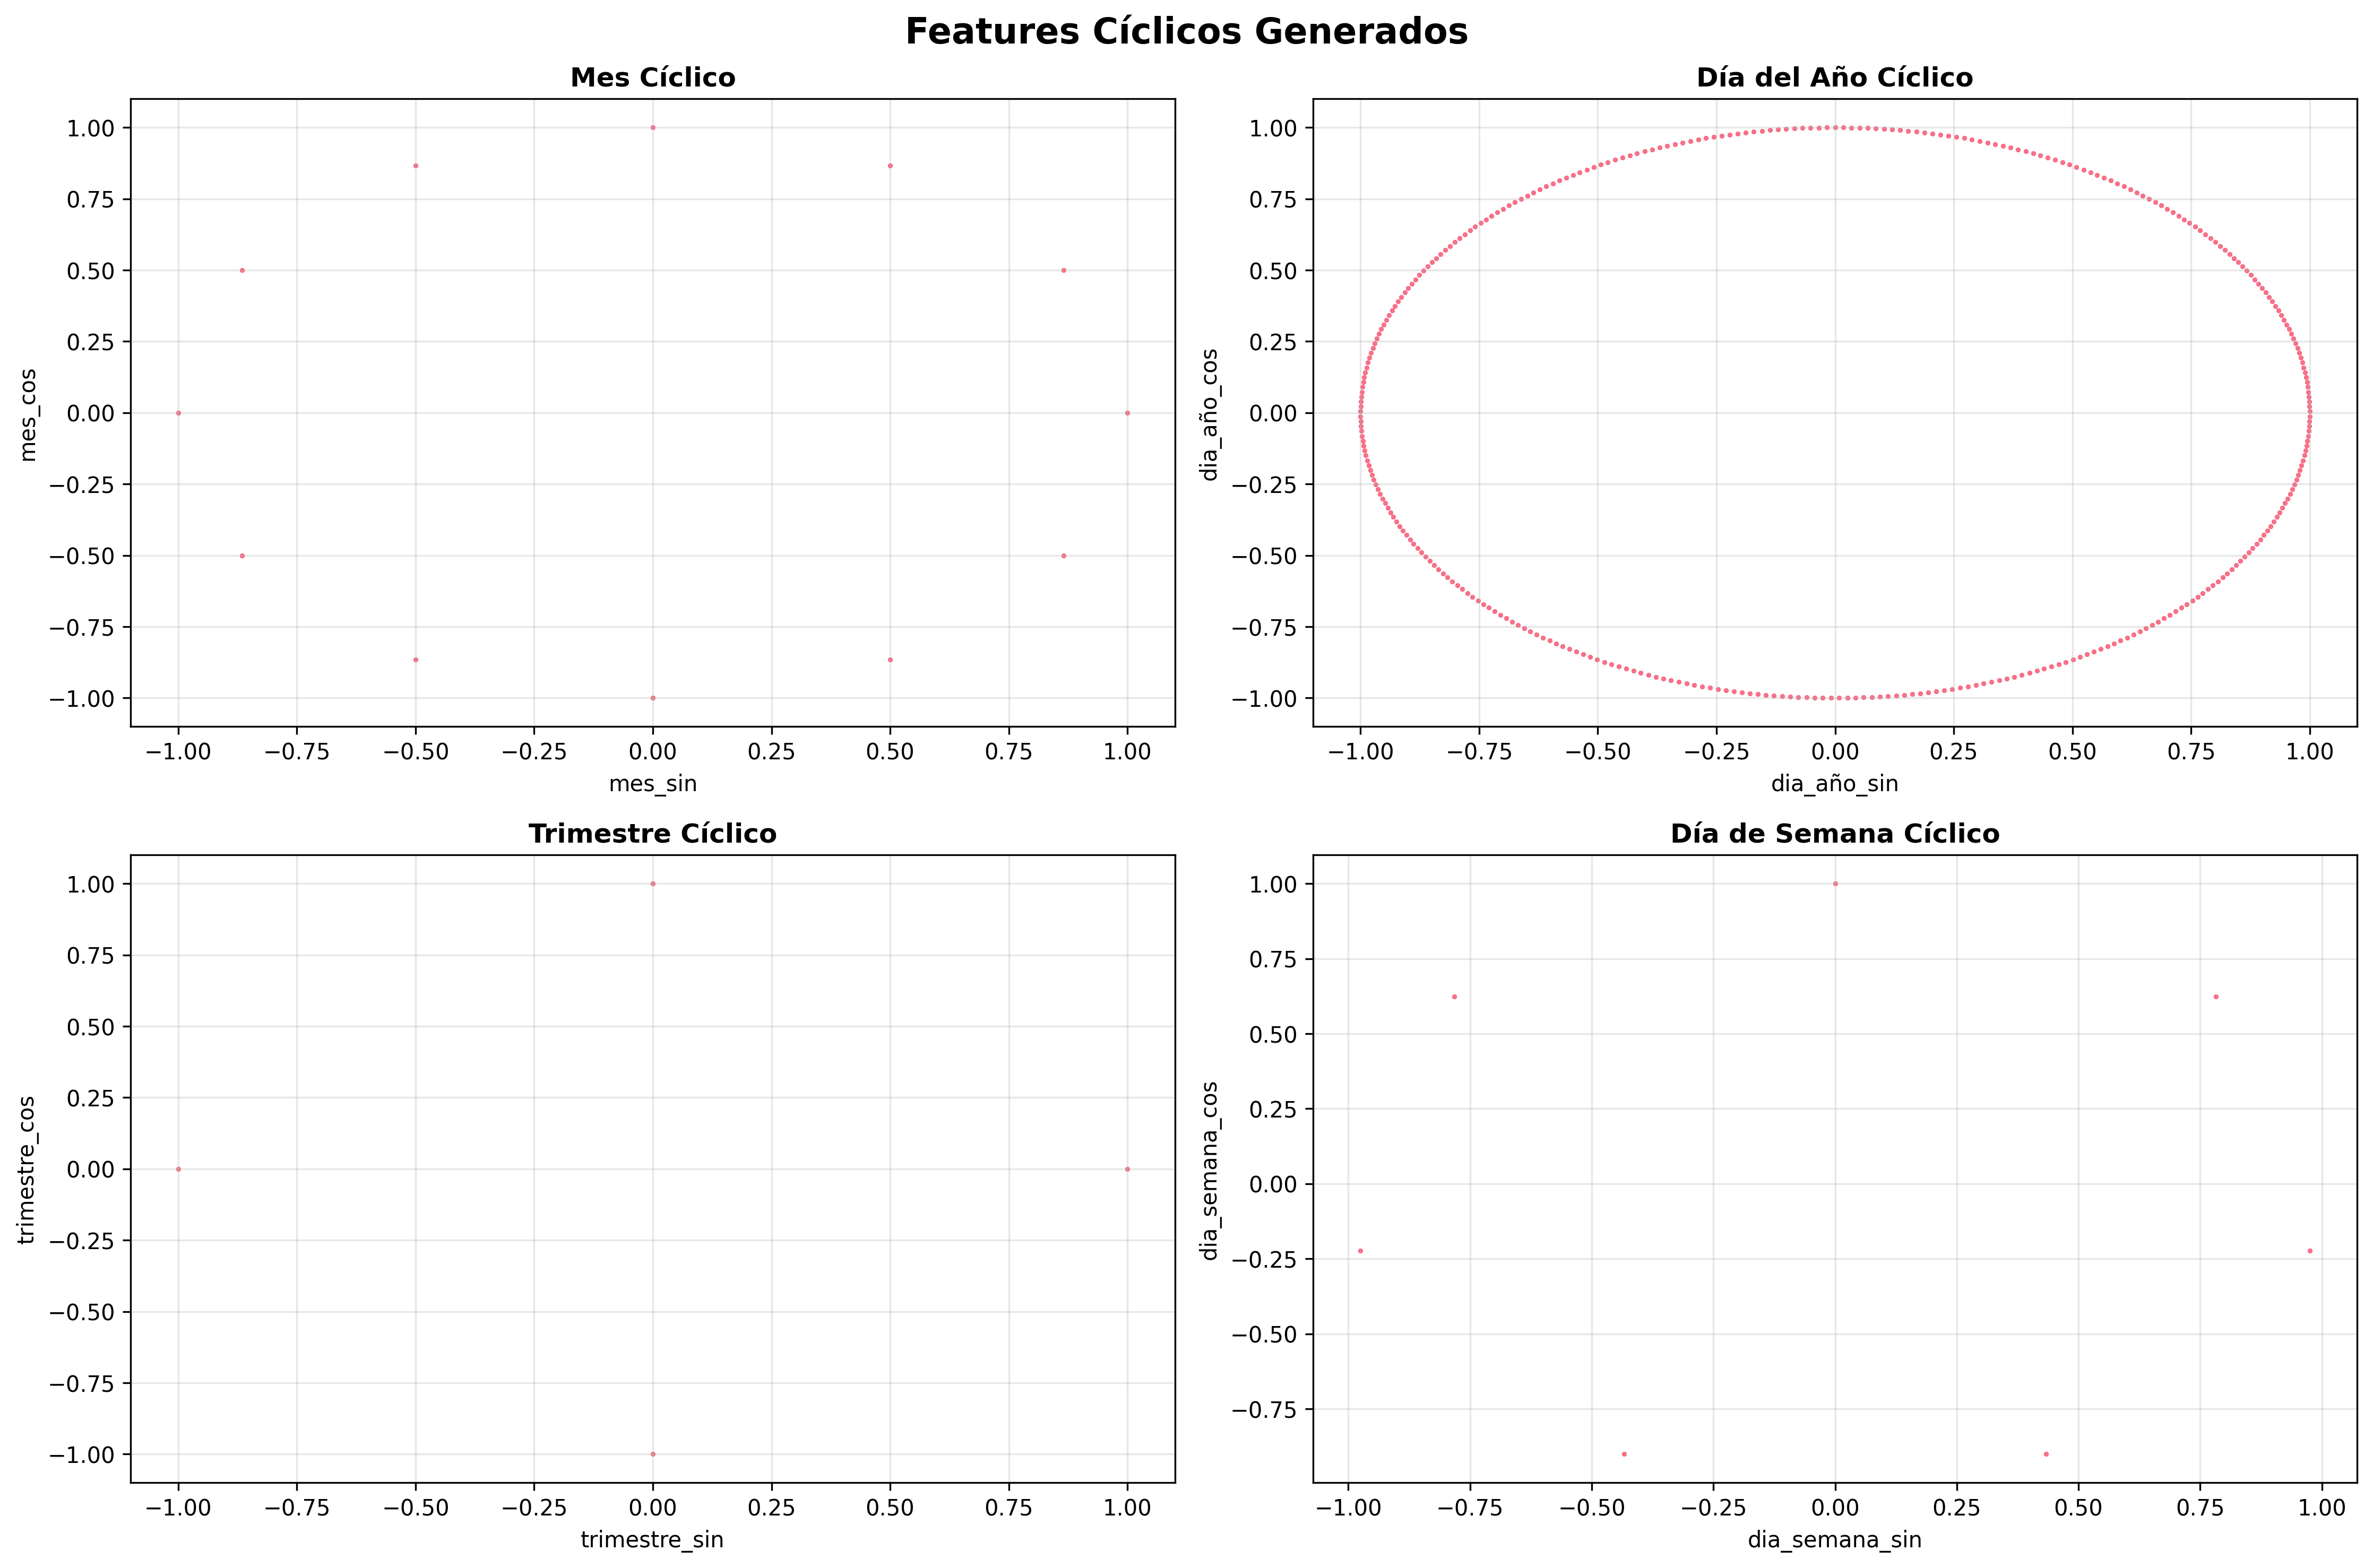


📊 VALORES_NULOS_DATOS:


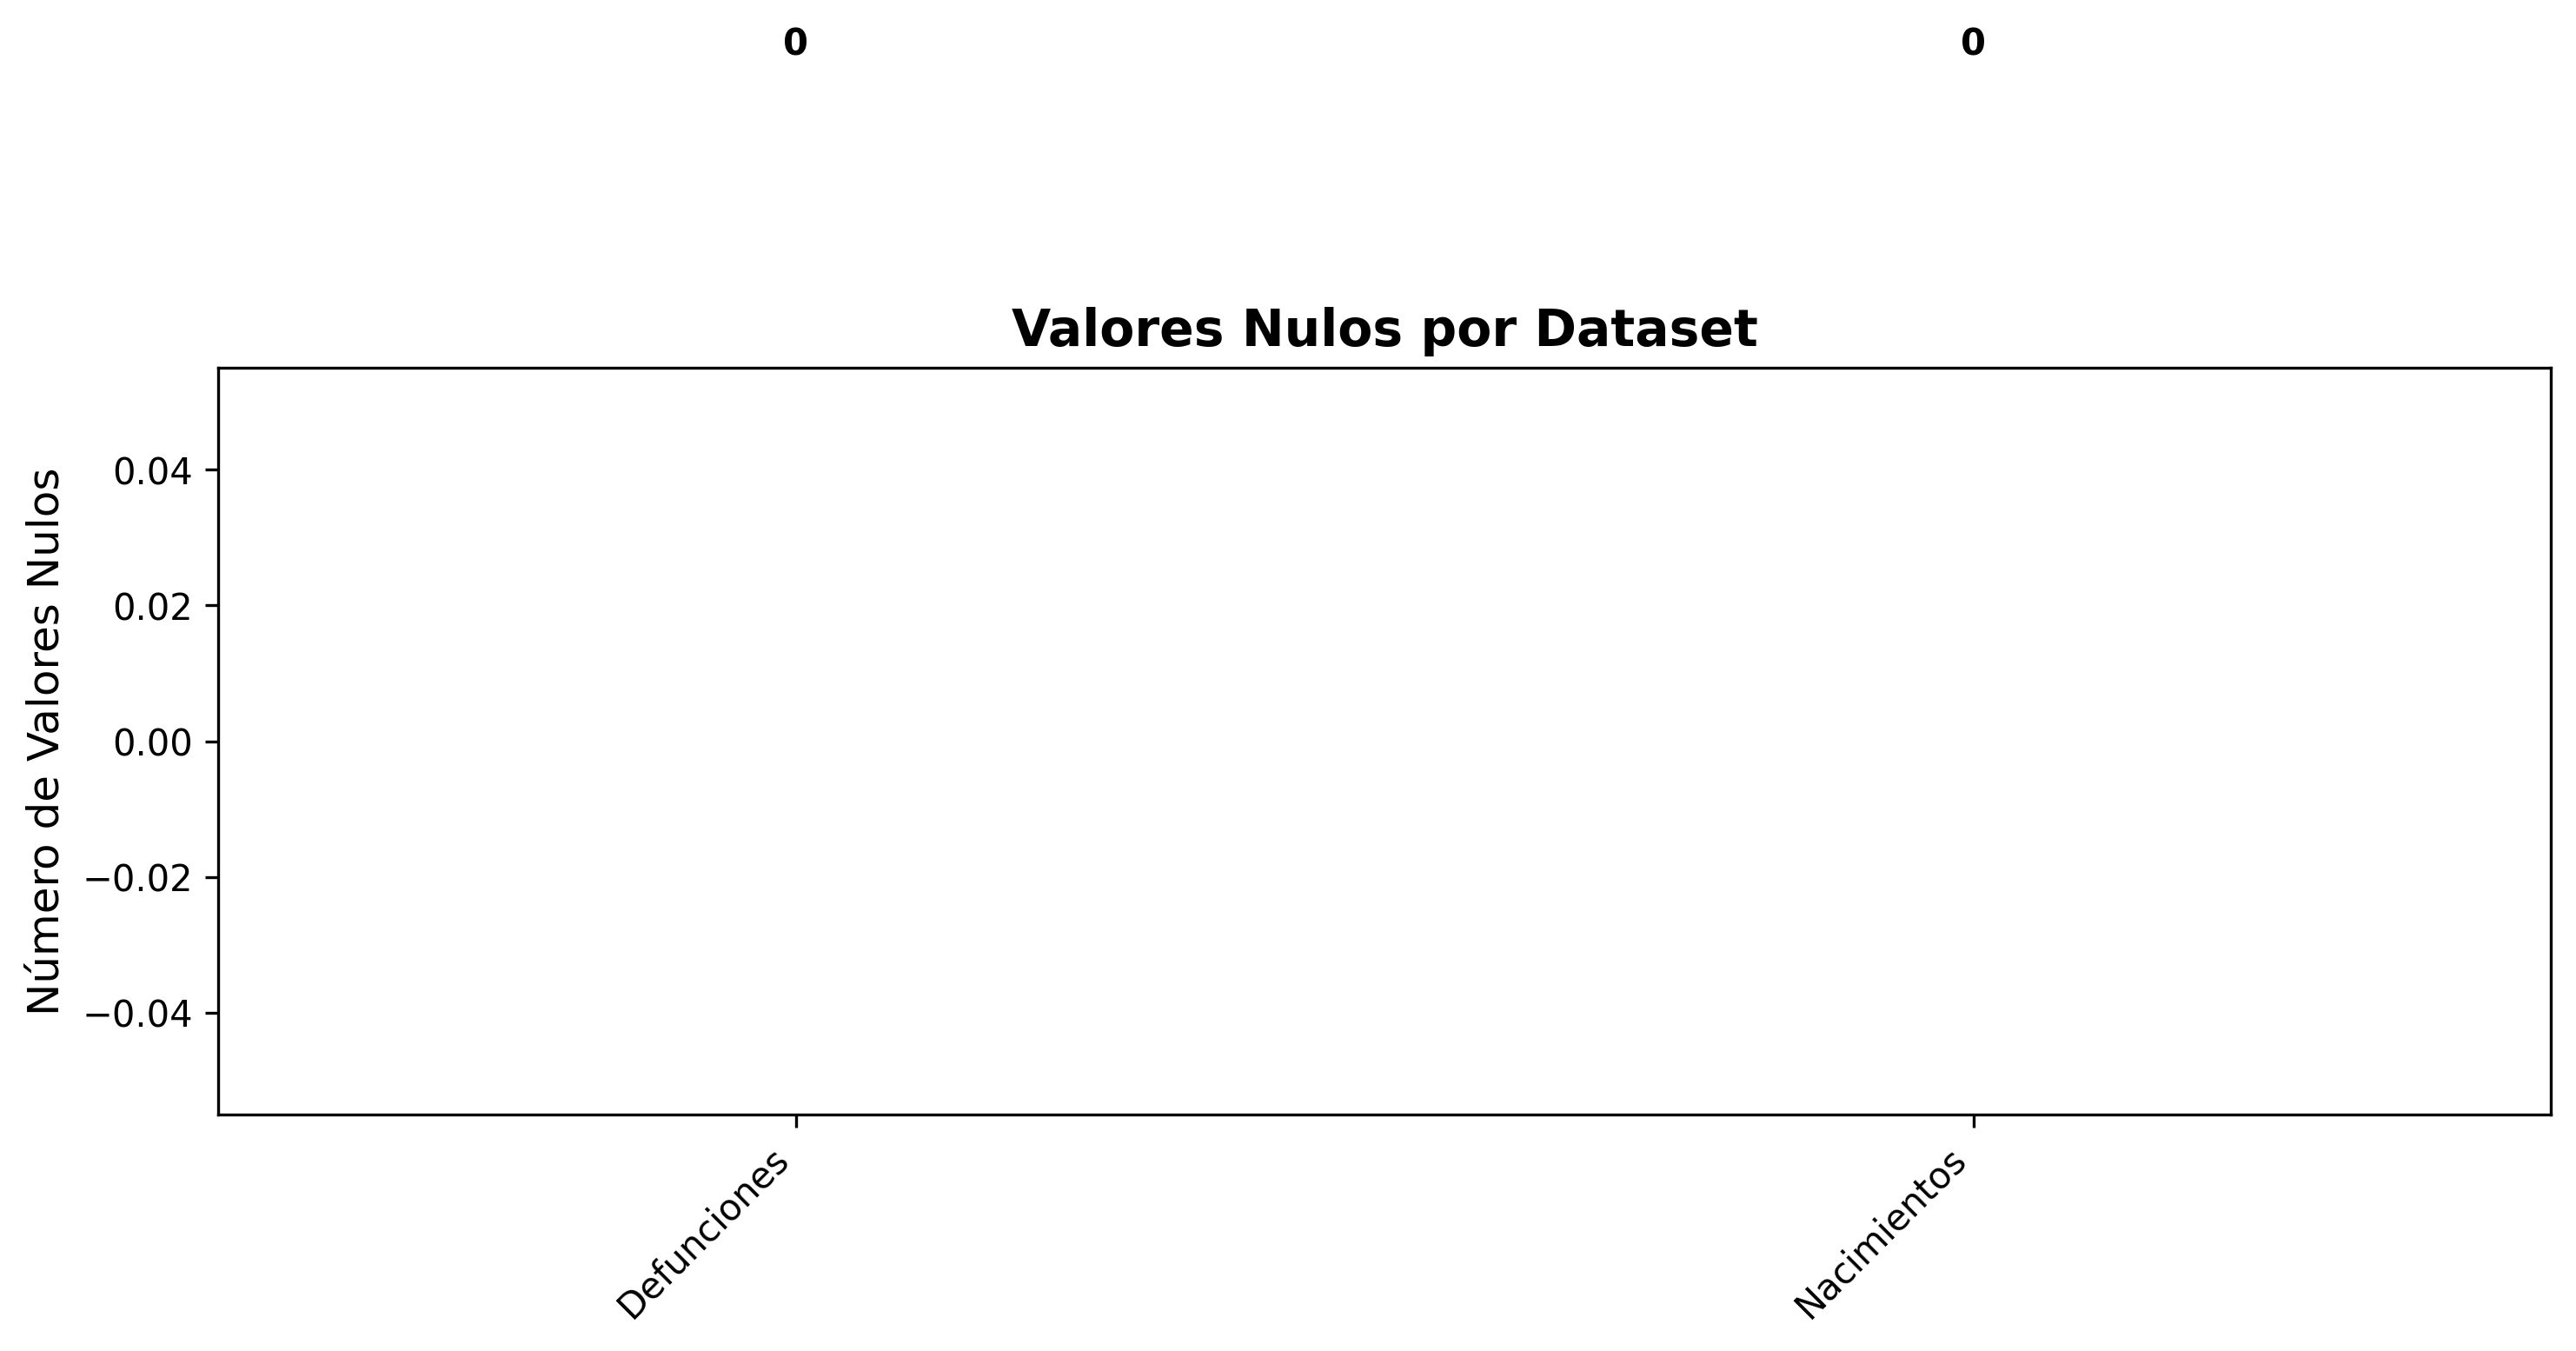

In [7]:
# Mostrar visualizaciones generadas
try:
    from IPython.display import Image, display
    
    # Buscar archivos PNG en el directorio de reportes
    png_files = list(Path("../../data/08_reporting").glob("*.png"))
    
    if png_files:
        print("VISUALIZACIONES GENERADAS:")
        print("=" * 30)
        
        for png_file in png_files:
            print(f"\n📊 {png_file.stem.upper()}:")
            try:
                display(Image(str(png_file)))
            except Exception as e:
                print(f"Error mostrando {png_file.name}: {e}")
    else:
        print("No se encontraron visualizaciones PNG")
        print("Ejecuta primero: kedro run --pipeline=reportes")
        
except ImportError:
    print("IPython no disponible para mostrar imágenes")
    print("Las visualizaciones están guardadas en data/08_reporting/")
    
    # Mostrar rutas de archivos
    png_files = list(Path("../../data/08_reporting").glob("*.png"))
    if png_files:
        print("\nArchivos PNG disponibles:")
        for png_file in png_files:
            print(f"  - {png_file}")
except Exception as e:
    print(f"Error mostrando visualizaciones: {e}")


## 6. Reporte Final Consolidado


In [8]:
# Cargar reporte final consolidado
try:
    reporte_final = catalog.load('reporte_final_consolidado')
    
    print("REPORTE FINAL CONSOLIDADO")
    print("=" * 40)
    
    # Mostrar información general
    if 'informacion_general' in reporte_final:
        print("\n📋 INFORMACIÓN GENERAL:")
        for campo, valor in reporte_final['informacion_general'].items():
            print(f"  {campo}: {valor}")
    
    # Mostrar resumen ejecutivo
    if 'resumen_ejecutivo' in reporte_final:
        print(f"\n📊 RESUMEN EJECUTIVO:")
        for campo, valor in reporte_final['resumen_ejecutivo'].items():
            print(f"  {campo}: {valor}")
    
    # Mostrar recomendaciones generales
    if 'recomendaciones_generales' in reporte_final:
        print(f"\n💡 RECOMENDACIONES GENERALES:")
        for i, recomendacion in enumerate(reporte_final['recomendaciones_generales'], 1):
            print(f"   {i}. {recomendacion}")
    
    # Mostrar archivos generados
    if 'archivos_generados' in reporte_final:
        print(f"\n📁 ARCHIVOS GENERADOS:")
        for tipo, archivos in reporte_final['archivos_generados'].items():
            print(f"  {tipo}:")
            if isinstance(archivos, dict):
                for nombre, ruta in archivos.items():
                    print(f"    - {nombre}: {ruta}")
            else:
                print(f"    {archivos}")
    
    print(f"\n✅ REPORTE CONSOLIDADO GENERADO EXITOSAMENTE")
    print(f"📅 Fecha: {reporte_final.get('informacion_general', {}).get('fecha_generacion', 'N/A')}")
    print(f"📊 Metodología: {reporte_final.get('informacion_general', {}).get('metodologia', 'N/A')}")
        
except Exception as e:
    print(f"Error cargando reporte final: {e}")
    print("Asegúrate de haber ejecutado: kedro run --pipeline=reportes")


[09/17/25 15:10:09] INFO     Loading data from reporte_final_consolidado (PickleDataset)...    ]8;id=167262;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=531118;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

REPORTE FINAL CONSOLIDADO

📋 INFORMACIÓN GENERAL:
  fecha_generacion: 2025-09-17 15:05:44
  version: 1.0
  metodologia: CRISP-DM - Fase 3: Preparación de Datos

📊 RESUMEN EJECUTIVO:
  estado_calidad: REQUIERE_ATENCION
  features_generados: 31
  visualizaciones_generadas: 5

💡 RECOMENDACIONES GENERALES:
   1. Defunciones: Completitud baja, revisar valores faltantes
   2. Features cíclicos completos para modelado temporal
   3. Revisar calidad de datos antes del modelado

📁 ARCHIVOS GENERADOS:
  visualizaciones_calidad:
    - completitud: data\08_reporting\completitud_datos.png
    - duplicados: data\08_reporting\duplicados_datos.png
    - valores_nulos: data\08_reporting\valores_nulos_datos.png
  visualizaciones_features:
    - features_ciclicos: data\08_reporting\features_ciclicos.png
    - distribucion_temporal: data\08_reporting\distribucion_temporal.png

✅ REPORTE CONSOLIDADO GENERADO EXITOSAMENTE
📅 Fecha: 2025-09-17 15:05:44
📊 Metodología: CRISP-DM - Fase 3: Preparación de Datos


## 7. Resumen y Próximos Pasos


In [9]:
print("RESUMEN DEL PIPELINE DE REPORTES")
print("=" * 40)

print("\n📊 REPORTES GENERADOS:")
print("   • Reporte de Calidad de Datos")
print("   • Reporte de Features Temporales") 
print("   • Reporte Final Consolidado")

print("\n🖼️ VISUALIZACIONES GENERADAS:")
print("   • Features Cíclicos (scatter plots)")
print("   • Distribución Temporal (bar charts)")
print("   • Métricas de Calidad (si hay datos suficientes)")

print("\n📁 ARCHIVOS CREADOS:")
print("   • data/08_reporting/reporte_*.pkl")
print("   • data/08_reporting/*.png")
print("   • data/08_reporting/visualizaciones_*.pkl")

print("\n🎯 ESTADO DEL PROYECTO:")
print("   ✅ Fase 1: Comprensión del Negocio")
print("   ✅ Fase 2: Comprensión de los Datos")
print("   ✅ Fase 3: Preparación de los Datos")
print("      ✅ Pipeline de Ingeniería de Datos")
print("      ✅ Pipeline de Ciencia de Datos")
print("      ✅ Pipeline de Reportes")

print("\n🚀 PRÓXIMOS PASOS:")
print("   1. Crear modelos de Machine Learning")
print("   2. Implementar pipeline de modelado")
print("   3. Generar métricas de evaluación")
print("   4. Crear dashboard interactivo")

print("\n📋 CÓMO USAR ESTE NOTEBOOK:")
print("   1. Ejecutar: kedro run --pipeline=reportes")
print("   2. Abrir: kedro jupyter notebook")
print("   3. Ejecutar todas las celdas")
print("   4. Revisar reportes y visualizaciones")

print("\n✅ PROYECTO LISTO PARA MODELADO!")


RESUMEN DEL PIPELINE DE REPORTES

📊 REPORTES GENERADOS:
   • Reporte de Calidad de Datos
   • Reporte de Features Temporales
   • Reporte Final Consolidado

🖼️ VISUALIZACIONES GENERADAS:
   • Features Cíclicos (scatter plots)
   • Distribución Temporal (bar charts)
   • Métricas de Calidad (si hay datos suficientes)

📁 ARCHIVOS CREADOS:
   • data/08_reporting/reporte_*.pkl
   • data/08_reporting/*.png
   • data/08_reporting/visualizaciones_*.pkl

🎯 ESTADO DEL PROYECTO:
   ✅ Fase 1: Comprensión del Negocio
   ✅ Fase 2: Comprensión de los Datos
   ✅ Fase 3: Preparación de los Datos
      ✅ Pipeline de Ingeniería de Datos
      ✅ Pipeline de Ciencia de Datos
      ✅ Pipeline de Reportes

🚀 PRÓXIMOS PASOS:
   1. Crear modelos de Machine Learning
   2. Implementar pipeline de modelado
   3. Generar métricas de evaluación
   4. Crear dashboard interactivo

📋 CÓMO USAR ESTE NOTEBOOK:
   1. Ejecutar: kedro run --pipeline=reportes
   2. Abrir: kedro jupyter notebook
   3. Ejecutar todas las cel